In [2]:
import numpy as np
import os

from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from IPython.display import display, Math, Latex

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI
import matplotlib.pyplot as plt
from qiskit import IBMQ, QuantumCircuit, pulse, schedule, transpile
from scipy.optimize import curve_fit


QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

authentication = get_authentication()
#authentication = set_authentication('YOUR_API_TOKEN',QI_URL)
QI.set_authentication(authentication, QI_URL)
QI.set_project_name('Charger-mediated Charging q4-q1')


backend = QI.get_backend('Starmon-5')

font = {'family':'serif','size':18}

In [3]:
def finding_value(counts,qubit,shots):
    total = 0
    if qubit == 0:
        for binary_string, number in counts.items():
            if binary_string[4] == '1':
                total += number
    if qubit == 1:
        for binary_string, number in counts.items():
             if binary_string[3] == '1':
                total += number
    if qubit == 2:
        for binary_string, number in counts.items():
             if binary_string[2] == '1':
                total += number
    if qubit == 3:
        for binary_string, number in counts.items():
             if binary_string[1] == '1':
                total += number
    if qubit == 4:
        for binary_string, number in counts.items():
             if binary_string[0] == '1':
                total += number
    return total/shots

In [4]:
from fractions import Fraction
import matplotlib.ticker as ticker

#function to get pi axis labels 
def pi_axis(value, tick_number):
    if np.isclose(value, 0):  
        return '0'
    elif np.isclose(value, np.pi): 
        return r'$\pi$'
    else:
        frac = Fraction(value / np.pi).limit_denominator(8)  
        if frac == 1:
            return r'$\pi$'
        elif frac == -1:
            return r'$-\pi$'
        else:
            if frac.numerator == 1:
                return r'$\frac{\pi}{' + f"{frac.denominator}" + r'}$'
            elif frac.numerator == -1:
                return r'$\frac{-\pi}{' + f"{frac.denominator}" + r'}$'
            else:
                return r'$\frac{' + f"{frac.numerator}\pi" + r'}{' + f"{frac.denominator}" + r'}$'

In [5]:
theta = np.linspace(0, np.pi, 16)
num_datapoints = 10
shots = 1024

charger=2
qubit=4

data_q4=[]
y_values=[] 


#for i in range(num_datapoints):
#    for t in theta:
#        qr = QuantumRegister(5)
#        cr = ClassicalRegister(5)
#        qc = QuantumCircuit(qr,cr)
#        qc.rx(t,charger)
#        qc.cnot(charger,qubit)
#        qc.measure(qr[qubit],cr[qubit])
        
#        job = backend.run(qc,shots)
#        counts = job.result().get_counts()
#        y_values.append(finding_value(counts,qubit,shots))
        
#    data_q4.append(y_values)
#    y_values=[]

In [6]:
print(data_q4)

[]


In [7]:
data_q4=[[0.0390625, 0.0419921875, 0.08203125, 0.1435546875, 0.1845703125, 0.255859375, 0.3095703125, 0.4580078125, 0.55078125, 0.6357421875, 0.7568359375, 0.81640625, 0.8701171875, 0.896484375, 0.94140625, 0.955078125], [0.0302734375, 0.033203125, 0.087890625, 0.12890625, 0.16015625, 0.248046875, 0.333984375, 0.439453125, 0.5537109375, 0.6455078125, 0.732421875, 0.810546875, 0.87109375, 0.9033203125, 0.9384765625, 0.9482421875], [0.03515625, 0.048828125, 0.0751953125, 0.1396484375, 0.1787109375, 0.2646484375, 0.3310546875, 0.4541015625, 0.5390625, 0.6669921875, 0.71875, 0.8125, 0.8603515625, 0.908203125, 0.958984375, 0.94140625], [0.0361328125, 0.029296875, 0.0771484375, 0.130859375, 0.16796875, 0.2265625, 0.310546875, 0.447265625, 0.51953125, 0.6455078125, 0.7275390625, 0.8095703125, 0.8447265625, 0.90234375, 0.93359375, 0.9560546875], [0.03125, 0.037109375, 0.0869140625, 0.1259765625, 0.173828125, 0.263671875, 0.384765625, 0.4287109375, 0.541015625, 0.6484375, 0.72265625, 0.810546875, 0.8583984375, 0.9033203125, 0.93359375, 0.9453125], [0.017578125, 0.029296875, 0.0576171875, 0.1220703125, 0.1640625, 0.23046875, 0.36328125, 0.42578125, 0.54296875, 0.6298828125, 0.748046875, 0.8095703125, 0.873046875, 0.8984375, 0.939453125, 0.9501953125], [0.0234375, 0.0419921875, 0.0615234375, 0.154296875, 0.171875, 0.263671875, 0.345703125, 0.4541015625, 0.548828125, 0.646484375, 0.7353515625, 0.8115234375, 0.828125, 0.892578125, 0.9306640625, 0.9384765625], [0.03515625, 0.0361328125, 0.0810546875, 0.1376953125, 0.169921875, 0.2421875, 0.3212890625, 0.4169921875, 0.5390625, 0.654296875, 0.75390625, 0.806640625, 0.8388671875, 0.912109375, 0.931640625, 0.9453125], [0.03515625, 0.046875, 0.076171875, 0.123046875, 0.16015625, 0.263671875, 0.330078125, 0.44921875, 0.537109375, 0.64453125, 0.751953125, 0.791015625, 0.8408203125, 0.9140625, 0.9423828125, 0.9453125], [0.0244140625, 0.0380859375, 0.0908203125, 0.125, 0.1826171875, 0.2802734375, 0.35546875, 0.4365234375, 0.5400390625, 0.658203125, 0.7587890625, 0.8154296875, 0.8427734375, 0.912109375, 0.953125, 0.95703125]]


## Plot raw data

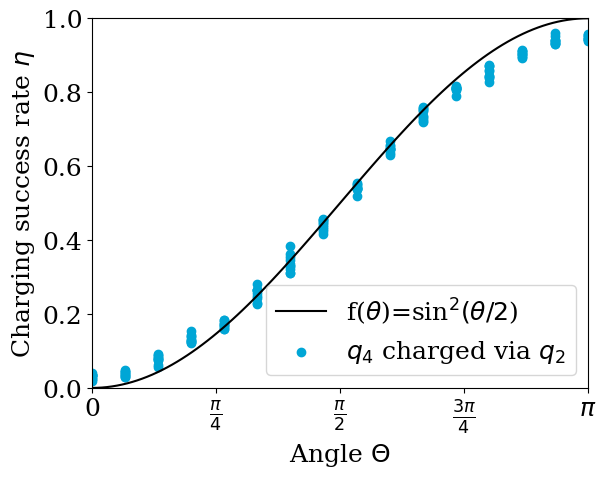

In [8]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(data_q4)):
    plt.scatter(theta,data_q4[i],color=tud_color)

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)

plt.xlim(0, np.pi)
plt.ylim(0, 1)

plt.xticks(font=font)
plt.yticks(font=font)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$q_4$ charged via $q_2$"], prop=font, loc="lower right")


## Mean Values & Errors

In [9]:
dataF=np.array(data_q4)
data=dataF.transpose()

In [10]:
#Mean Value
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 
    
print('Mean values:', mean_values)
print('')

#Standard Deviation
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

print('Standard Deviation:', std_dev)
print('')

#Standard Error
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t]) / np.sqrt(np.size(data[t])))
    
print('Standard Error:', std_err)
print('')

#Maximum values 
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 
print('Maximum values:',max_values)
print('')
    
#Minimum values
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
print('Minimum values:',min_values)

Mean values: [0.03076171875, 0.03828125, 0.07763671875, 0.13310546875, 0.17138671875, 0.25390625, 0.33857421875, 0.441015625, 0.5412109375, 0.64755859375, 0.740625, 0.809375, 0.85283203125, 0.904296875, 0.94033203125, 0.9482421875]

Standard Deviation: [0.00651082355499347, 0.006370900949335973, 0.010318805038702777, 0.009921125248493189, 0.008243136238346745, 0.016028719875269007, 0.022706075666930708, 0.013117964539224206, 0.008980128072322381, 0.010039613463723418, 0.014213597967703322, 0.00669212566367649, 0.014983473256398042, 0.006863782574533429, 0.008837216177649373, 0.005972220645086193]

Standard Error: [0.002058903187725392, 0.0020146557747230667, 0.00326309266535227, 0.003137335273704247, 0.002606708557624832, 0.0050687262782660066, 0.00718029158316278, 0.004148264620926969, 0.0028397658388555997, 0.0031748045373058247, 0.004494734332388289, 0.002116235948528365, 0.004738190275043789, 0.0021705186299700065, 0.0027945731296659206, 0.0018885819927552455]

Maximum values: [0.0

# Curve Fit

In [11]:
from scipy.optimize import curve_fit

In [12]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

guess = [0.9999, 0]

xdata=theta
ydata=mean_values

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)


fit_a = parameters[0]
fit_b = parameters[1]

In [13]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.96041 with standard error of 0.00393.
The value of phi is -0.04785 with standard error of 0.02158.


In [14]:
x_func = np.linspace(min(theta), max(theta), 1000)
fit_sin2 = sin2_func(x_func, fit_a, fit_b)

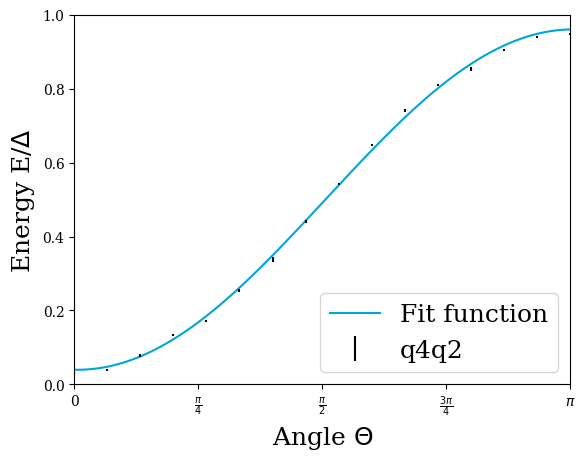

In [15]:

plt.plot(x_func, fit_sin2 , '-', label='fit',color=tud_color)
#plt.errorbar(theta, mean_values, yerr=std_err, fmt='.', ecolor='black',capsize=3)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)

plt.xlim(0, np.pi)
plt.ylim(0, 1)


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)
plt.legend(["Fit function", "q4q2"], prop=font, loc="lower right")